<a href="https://colab.research.google.com/github/aakashv000/Machine-Learning-Lab-CS3103/blob/master/Lab_8_Bag_of_Visual_Words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get Image

In [0]:
from skimage import data

In [40]:
img = data.camera()

img.shape, type(img), img

((512, 512), numpy.ndarray, array([[156, 157, 160, ..., 152, 152, 152],
        [156, 157, 159, ..., 152, 152, 152],
        [158, 157, 156, ..., 152, 152, 152],
        ...,
        [121, 123, 126, ..., 121, 113, 111],
        [121, 123, 126, ..., 121, 113, 111],
        [121, 123, 126, ..., 121, 113, 111]], dtype=uint8))

## Show Image

In [0]:
import matplotlib.pyplot as plt

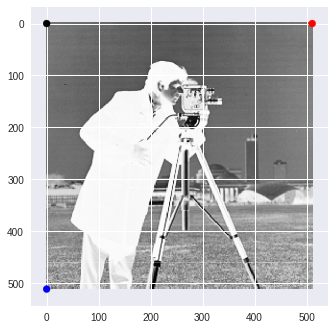

In [24]:
# plt.plot(img)
plt.imshow(img, interpolation='nearest')
plt.scatter(x=[0, 511, 0], y=[0, 0, 511], c=('black', 'r', 'b'))    # origin -> black, x-axis -> red, y-axis -> blue
plt.show()

In [0]:
from PIL import Image

In [0]:
image = Image.fromarray(img, 'L')
print(image, type(image), image.size)
image.save('image.jpeg')

<PIL.Image.Image image mode=L size=512x512 at 0x7EFD3905D240> <class 'PIL.Image.Image'> (512, 512)


In [47]:
import numpy as np

a = [[1, 20, 30], [40, 50, 60]]
a = np.array(a)
im = Image.fromarray(a, 'L')
print(a.shape, im.size)

(2, 3) (3, 2)


## Organize Directory

In [27]:
! mkdir dataset
# ! mkdir dataset/1
! ls

mkdir: cannot create directory ‘dataset’: File exists
dataset  image.jpeg  sample_data


In [0]:
! rm dataset/*.jpg

## Slicing Image into Chunks

In [0]:
# N_CHUNKS_PER_AXIS = 32
DIM_PATCH = (128, 128)

In [51]:
n_chunk_x = int(image.size[1] / DIM_PATCH[0])
n_chunk_y = image.size[0] // DIM_PATCH[1]
print(n_chunk_x, n_chunk_y, type(n_chunk_x))

for x_coord in range(n_chunk_x):
    for y_coord in range(n_chunk_y):
        patch_loc = (x_coord*DIM_PATCH[0], y_coord*DIM_PATCH[1], (x_coord+1)*DIM_PATCH[0], (y_coord+1)*DIM_PATCH[1])    # (left, top, right, down)
        print(patch_loc)
        
        patch = image.crop(box=patch_loc)
        patch.save('dataset/' + str(x_coord) + '_' + str(y_coord) + '.jpg')

4 4 <class 'int'>
(0, 0, 128, 128)
(0, 128, 128, 256)
(0, 256, 128, 384)
(0, 384, 128, 512)
(128, 0, 256, 128)
(128, 128, 256, 256)
(128, 256, 256, 384)
(128, 384, 256, 512)
(256, 0, 384, 128)
(256, 128, 384, 256)
(256, 256, 384, 384)
(256, 384, 384, 512)
(384, 0, 512, 128)
(384, 128, 512, 256)
(384, 256, 512, 384)
(384, 384, 512, 512)


## Slicing Numpy-Array into Chunks

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [0]:
# N_CHUNKS_PER_AXIS = 32
DIM_PATCH = (128, 128)

In [71]:
n_chunks_x = img.shape[0] // DIM_PATCH[0]
n_chunks_y = img.shape[1] // DIM_PATCH[1]
print(n_chunks_x, n_chunks_y)

img_vstrips = np.array_split(img, n_chunks_x, axis=0)
print(np.shape(img_vstrips))

img_patches = [np.array_split(vstrip, n_chunks_y, axis=1) for vstrip in img_vstrips]
print(np.shape(img_patches))

4 4
(4, 128, 512)
(4, 4, 128, 128)


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


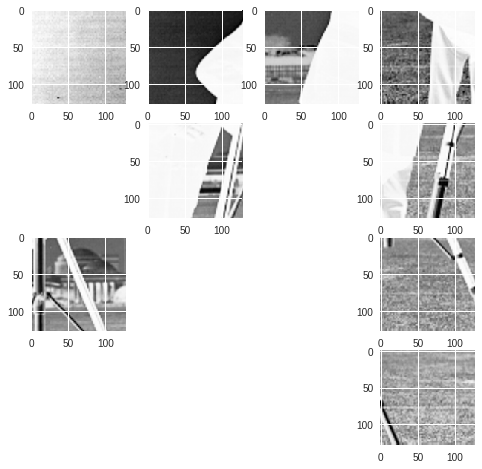

In [70]:
# TODO: Not properly oriented and some patches missing
fig = plt.figure(figsize=(DIM_PATCH[0]/16, DIM_PATCH[1]/16))

for i in range(n_chunks_x):
    for j in range(n_chunks_y):
        fig.add_subplot(n_chunks_x, n_chunks_y, (i+1)*(j+1))
        plt.imshow(img_patches[i][j])
plt.show()

In [74]:
for i in range(n_chunks_x):
    for j in range(n_chunks_y):
        patch = Image.fromarray(img_patches[i][j], 'L')
        print(patch, type(patch), patch.size)
        patch.save('dataset/array_' + str(i) + '_' + str(j) + '.jpg')

<PIL.Image.Image image mode=L size=128x128 at 0x7EFD38D5FB00> <class 'PIL.Image.Image'> (128, 128)
<PIL.Image.Image image mode=L size=128x128 at 0x7EFD386B7908> <class 'PIL.Image.Image'> (128, 128)
<PIL.Image.Image image mode=L size=128x128 at 0x7EFD38D5FA58> <class 'PIL.Image.Image'> (128, 128)
<PIL.Image.Image image mode=L size=128x128 at 0x7EFD38D5F198> <class 'PIL.Image.Image'> (128, 128)
<PIL.Image.Image image mode=L size=128x128 at 0x7EFD38D5FB00> <class 'PIL.Image.Image'> (128, 128)
<PIL.Image.Image image mode=L size=128x128 at 0x7EFD38D5FA58> <class 'PIL.Image.Image'> (128, 128)
<PIL.Image.Image image mode=L size=128x128 at 0x7EFD38D5F9E8> <class 'PIL.Image.Image'> (128, 128)
<PIL.Image.Image image mode=L size=128x128 at 0x7EFD38D5F198> <class 'PIL.Image.Image'> (128, 128)
<PIL.Image.Image image mode=L size=128x128 at 0x7EFD38D5FB00> <class 'PIL.Image.Image'> (128, 128)
<PIL.Image.Image image mode=L size=128x128 at 0x7EFD38D5FA58> <class 'PIL.Image.Image'> (128, 128)
<PIL.Image